In [4]:
import pandas as pd

df = pd.read_csv("c:/data/ozone/ozone.csv")
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


<Axes: >

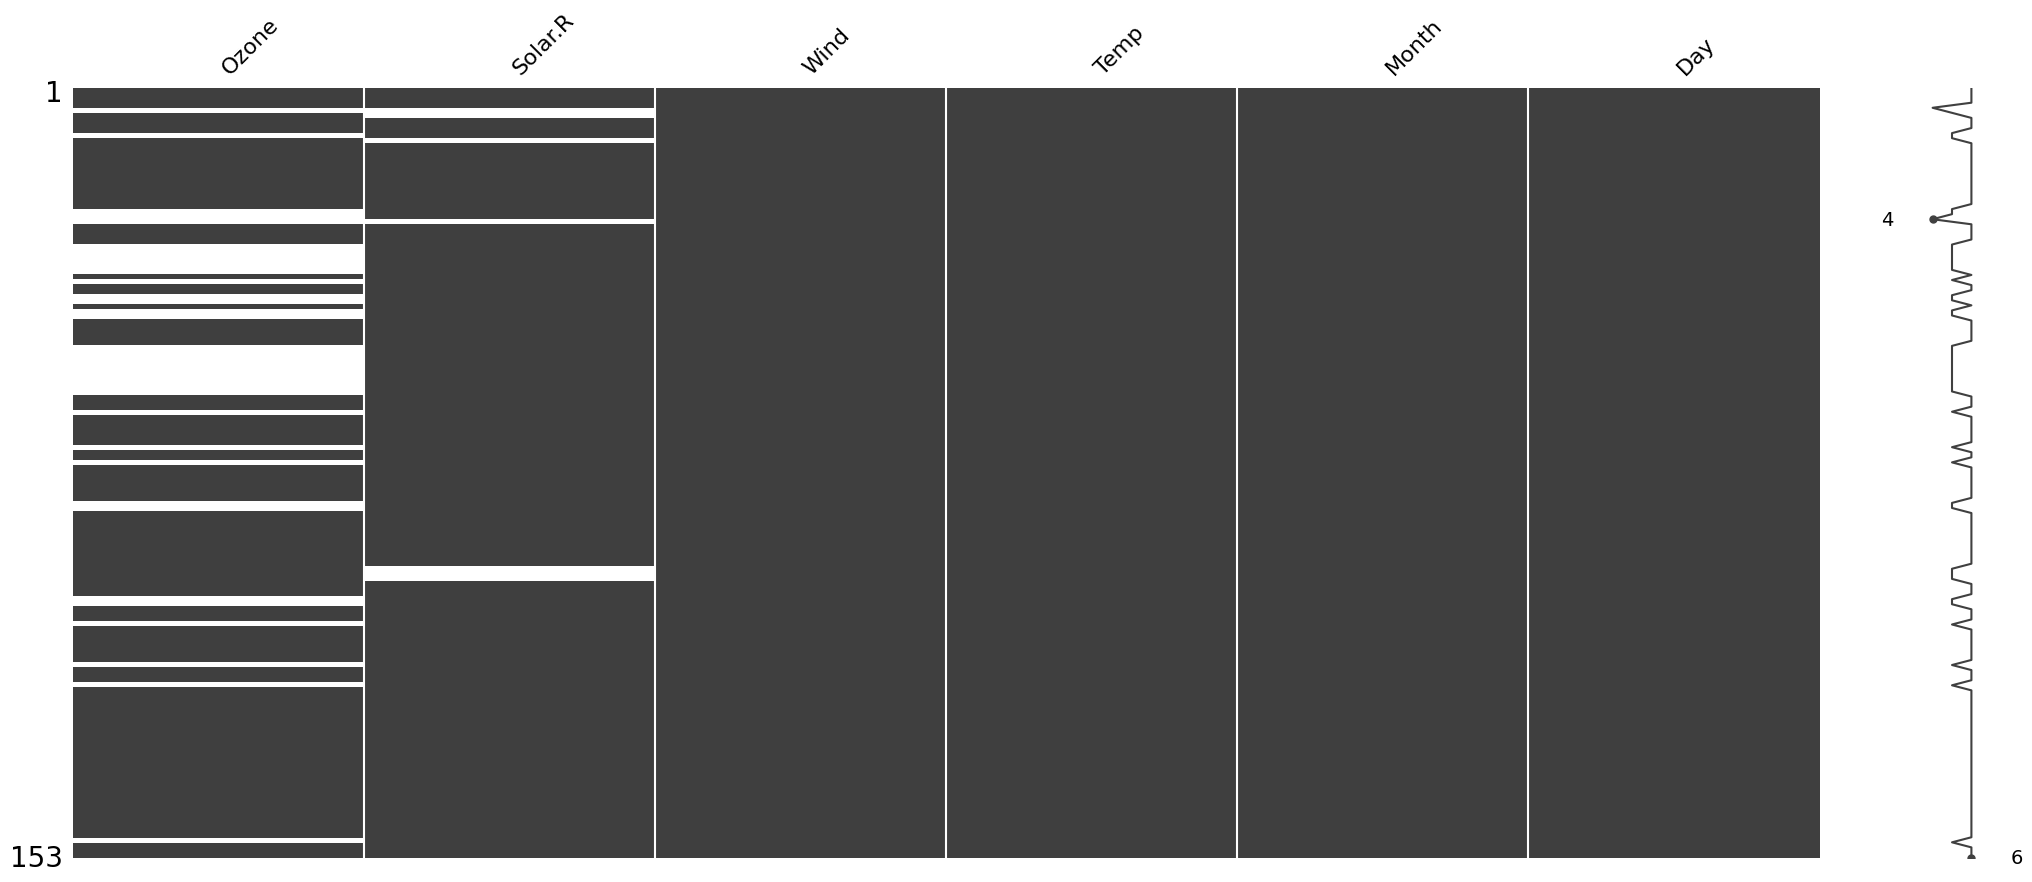

In [5]:
# 오존량, 일조량 결측값 처리

import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
# 흰색 - 결측값
# 스파크라인(spark line) - 각 샘플의 데이터 완성도를 표현

In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67.0,5.0,1.0
1,36.00000,118.000000,8.0,72.0,5.0,2.0
2,12.00000,149.000000,12.6,74.0,5.0,3.0
3,18.00000,313.000000,11.5,62.0,5.0,4.0
4,42.12931,185.931507,14.3,56.0,5.0,5.0
...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70.0,9.0,26.0
149,42.12931,145.000000,13.2,77.0,9.0,27.0
150,14.00000,191.000000,14.3,75.0,9.0,28.0
151,18.00000,131.000000,8.0,76.0,9.0,29.0


In [8]:
X = df[["Solar.R", "Wind", "Temp"]]
y = df["Ozone"]

In [10]:
import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Ozone   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.828
Method:                 Least Squares   F-statistic:                              246.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):                    9.03e-58
Time:                        10:47:10   Log-Likelihood:                         -682.21
No. Observations:                 153   AIC:                                      1370.
Df Residuals:                     150   BIC:                                      1380.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Solar.R        0.0600      0.020      2.969      0.003       0.020       0.100
Wind          -3.4514      0.408     -8.459      0.000      -4.258      -2.645
Temp           0.8430      0.071     11.820      0.000       0.702       0.984
==============================================================================
Omnibus:                       40.837   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.840
Skew:                           1.210   Prob(JB):                     4.60e-18
Kurtosis:                       5.581   Cond. No.                         52.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# 일조량 92, 풍량 15.5, 화씨온도 84 일때의 오존량 예측
result.predict([92, 15.5, 84])

array([22.82932997])

In [12]:
result.save("c:/data/ozone/ozone_regress.model")

In [4]:
from statsmodels.regression.linear_model import OLSResults

# 학습된 모델 불러오기
model = OLSResults.load("c:/data/ozone/ozone_regress.model")

In [5]:
# 일조량 92, 풍량 15.5, 화씨온도 84 일때의 오존량 예측
model.predict([92, 15.5, 84])
#             새로운값 → 데이터를 입력한 순서대로

array([22.82932997])

In [6]:
# 일조량 80, 풍량 5.5, 화씨온도 64 일때의 오존량 예측
model.predict([80, 5.5, 64])

array([39.76437475])